# ML Exercise 4 Task 2
## author: Lorenz Rumberger

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy import stats
spambase = pd.DataFrame()
spambase = pd.read_csv("spambase.csv", sep = ',', header = None )
spambase = spambase.rename(index=str, columns={57: "spam"})

In [0]:
# First look at the data
spambase.describe()
X = spambase.drop(['spam'], axis = 1)
Y = spambase.spam

#Normalize data
def normalize(x):
    return(x - np.mean(x)) / (np.max(x) - np.min(x))

X = X.apply(normalize)
X['intercept'] = np.ones(len(X))

In [0]:
# Construct ~70% train, ~20% validation and 10% test data
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
X = X.values
Y = Y.values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.222, random_state=42)

In [0]:
# Matrix Dimensions
# n = len(X)
# X         -> n x k
# Y | z | h -> n x 1
# theta     -> k x 1
# grad      -> k x 1
# J         -> 1x1

# sigmoid squashing function
def sigmoid(z):
    return(1.0/(1 + np.exp(-z)))

def predict(theta, X):
    p = sigmoid(X.dot(theta.T))
    return(p)
           
def predict_class(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [0]:
# 2. a) Report F_theta
theta = (np.ones(min(X.shape)))
theta[len(theta)-1] = 0.5

Y_hat = predict_class(theta, X)
precision = np.count_nonzero( (Y + Y_hat) == 2)/np.count_nonzero(Y_hat == 1)
recall = np.count_nonzero( (Y + Y_hat) == 2)/np.count_nonzero( (Y - Y_hat) == 0)

F = (1+theta**2) * ((precision * recall)/(theta**2 * precision + recall))

In [0]:
# Implement logistic ridge regression
# Matrix Dimensions
# n = len(X)
# X         -> n x k
# Y | z | h -> n x 1
# theta     -> k x 1
# grad      -> k x 1
# J         -> 1x1

# Cost function based on the negative log likelyhood value
def costFunction(theta, X, y, alpha):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -(1/m)* (np.sum(y * np.log(h) + (1-y)*np.log(1-h)) + alpha**2 * np.sum(theta**2))
    return(J)

def gradient(theta, X, y, alpha):
    m = y.size
    h = sigmoid(np.dot(X,theta))
    intercept_grad = (1/m)*np.dot(X.T,(h-y))
    grad = (1/m)*np.dot(X.T,(h-y)) + 2* (alpha*theta)
    grad[len(grad)-1] = intercept_grad[len(grad)-1]
    return(grad.flatten())

def accuracy(y,y_hat):
    m = y.size
    acc = 1 - np.sum(abs(y-y_hat))/m
    return acc

In [0]:
def gradient_descent(X_train, X_test, Y_train, Y_test, theta, LR, alpha, iter):
    acc = np.zeros(iter)
    convergence = 0
    for i in range(1, iter):
        J = costFunction(theta, X_train, Y_train, alpha)
        grad = gradient(theta, X_train, Y_train, alpha)
        theta = theta - (LR*grad)
        y_hat_validation = predict(X_validation, theta)
        acc[i] = accuracy(Y_validation, y_hat_validation)
        convergence = acc[i] - acc[i-1]
        if convergence < 0.0000001:
            break
    return [theta, acc]

Accuracy:  0.756793478261


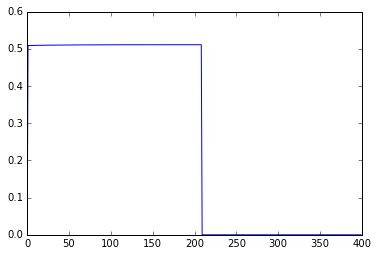

In [0]:
theta = (np.random.rand(min(X.shape)))
LearningRate = 0.1
alpha = 0.05
[theta, acc] = gradient_descent(X_train, X_validation, Y_train, Y_validation, theta, LearningRate, alpha, 400)
plt.plot(list(range(len(acc))),acc)
acc_class = accuracy(Y_validation, predict_class(X_validation, theta))
print("Accuracy: ", acc_class)

After 5-fold cross validation the Testset Accuracy finally is:  0.820846905537


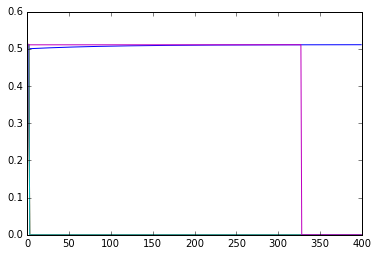

In [0]:
# 5-fold cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
five_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

theta = (np.zeros(min(X.shape)))
LearningRate = 0.1
alpha = 0.05
for train_index, validation_index in five_fold.split(X_train):
    X_train, X_validation = X[train_index], X[validation_index]
    Y_train, Y_validation = Y[train_index], Y[validation_index]
    [theta, acc] = gradient_descent(X_train, X_validation, Y_train, Y_validation, theta, LearningRate, alpha, 400)
    plt.plot(list(range(len(acc))),acc)
    
acc_class = accuracy(Y_test, predict_class(X_test, theta))
print("After 5-fold cross validation the Testset Accuracy finally is: ", acc_class)